In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score,classification_report,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",23)

In [4]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
for i in df.columns:
    print(i,df[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [9]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

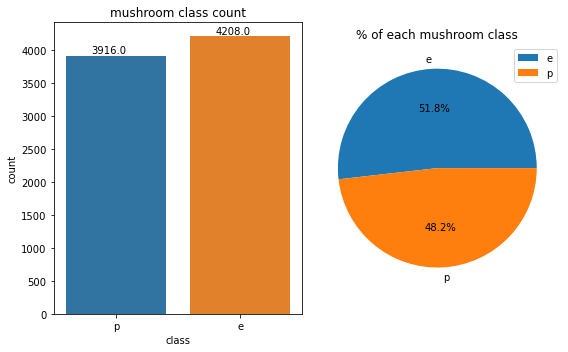

In [11]:
plt.figure(figsize=(8,5))
ax=plt.subplot(1,2,1)
sb.countplot(df['class'])
plt.title("mushroom class count")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+30))

ax=plt.subplot(1,2,2)
size=df['class'].value_counts()
label=df['class'].value_counts().index
plt.pie(size,labels=label,autopct='%.1f%%')
plt.title('% of each mushroom class')
plt.legend(label,loc='best')
plt.tight_layout()
plt.show()

In [12]:
df['class']=df['class'].apply(lambda x: 1 if x=='p' else 0)

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [14]:
df.drop('veil-type',axis=1,inplace=True)

In [15]:
df['stalk-root']=df['stalk-root'].replace('?',np.nan)

In [16]:
df['stalk-root']=df['stalk-root'].fillna(method='ffill')

In [17]:
df['cap-shape']=df['cap-shape'].replace(['x','b','s','f','k','c'],['convex','bell','sunken','flat','knobbed','conical'])

In [18]:
df['cap-surface']=df['cap-surface'].replace(['s','y','f','g'],['smooth','scaly','fibrous','grooves'])

In [19]:
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

df['cap-color']=df['cap-color'].replace(['n','y','w','g','e','p','b','u','c','r'],['brown','yellow','white','gray','red','pink','buff','purple','cinnamon','green'])

In [20]:
# bruises=t,no=f
df['bruises']=df['bruises'].replace(['t','f'],['bruises','no'])

In [21]:
#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
df['odor']=df['odor'].replace(['p','a','l','n','f','c','y','s','m'],['pungent','almond','anise','none','foul','creosote','fishy','spicy','musty'])

In [22]:
#gill-attachment: attached=a,descending=d,free=f,notched=n
df['gill-attachment']=df['gill-attachment'].replace(['f','a'],['free','attached'])

In [23]:
#gill-spacing: close=c,crowded=w,distant=d
df['gill-spacing']=df['gill-spacing'].replace(['c','w'],['close','crowded'])

In [24]:
#gill-size: broad=b,narrow=n
df['gill-size']=df['gill-size'].replace(['n','b'],['narrow','broad'])

In [25]:
#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
df['gill-color']=df['gill-color'].replace(['k','n','g','p','w','h','u','e','b','r','y','o'],['black','brown','gray','pink','white','chocolate','purple','red','buff','green','yellow','orange'])

In [26]:
# stalk-shape: enlarging=e,tapering=t
df['stalk-shape']=df['stalk-shape'].replace(['e','t'],['enlarging','tapering'])

In [27]:
# stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r
df['stalk-root']=df['stalk-root'].replace(['b','c','e','r'],['bulbous','club','equal','rooted'])

In [28]:
 # stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
df['stalk-surface-above-ring']=df['stalk-surface-above-ring'].replace(['s','f','k','y'],['smooth','fibrous','silky','scaly'])
df['stalk-surface-below-ring']=df['stalk-surface-below-ring'].replace(['s','f','k','y'],['smooth','fibrous','silky','scaly'])


In [29]:
# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
df['stalk-color-above-ring']=df['stalk-color-above-ring'].replace(['w','g','p','n','b','e','o','c','y'],['white','gray','pink','brown','buff','red','orange','cinnamon','yellow'])

In [30]:
df['stalk-color-below-ring']=df['stalk-color-below-ring'].replace(['w','g','p','n','b','e','o','c','y'],['white','gray','pink','brown','buff','red','orange','cinnamon','yellow'])

In [31]:
# veil-color: brown=n,orange=o,white=w,yellow=y
df['veil-color']=df['veil-color'].replace(['w','n','o','y'],['white','brown','orange','yellow'])

In [32]:
# ring-number: none=n,one=o,two=t
df['ring-number']=df['ring-number'].replace(['o','t','n'],['one','two','none'])

In [33]:
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
df['ring-type']=df['ring-type'].replace(['p','e','l','f','n'],['pendant','evanescent','large','flaring','none'])

In [34]:
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

df['spore-print-color']=df['spore-print-color'].replace(['k','n','u','h','w','r','o','y','b'],['black','brown','purple','chocolate','white','green','orange','yellow','buff'])

In [35]:
# population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

df['population']=df['population'].replace(['s','n','a','v','y','c'],['scattered','numerous','abundant','several','solitary','clustered'])

In [36]:
# habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

df['habitat']=df['habitat'].replace(['u','g','m','d','p','w','l'],['urban','grasses','meadows','woods','paths','waste','leaves'])

In [37]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,0,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,0,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,1,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,0,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


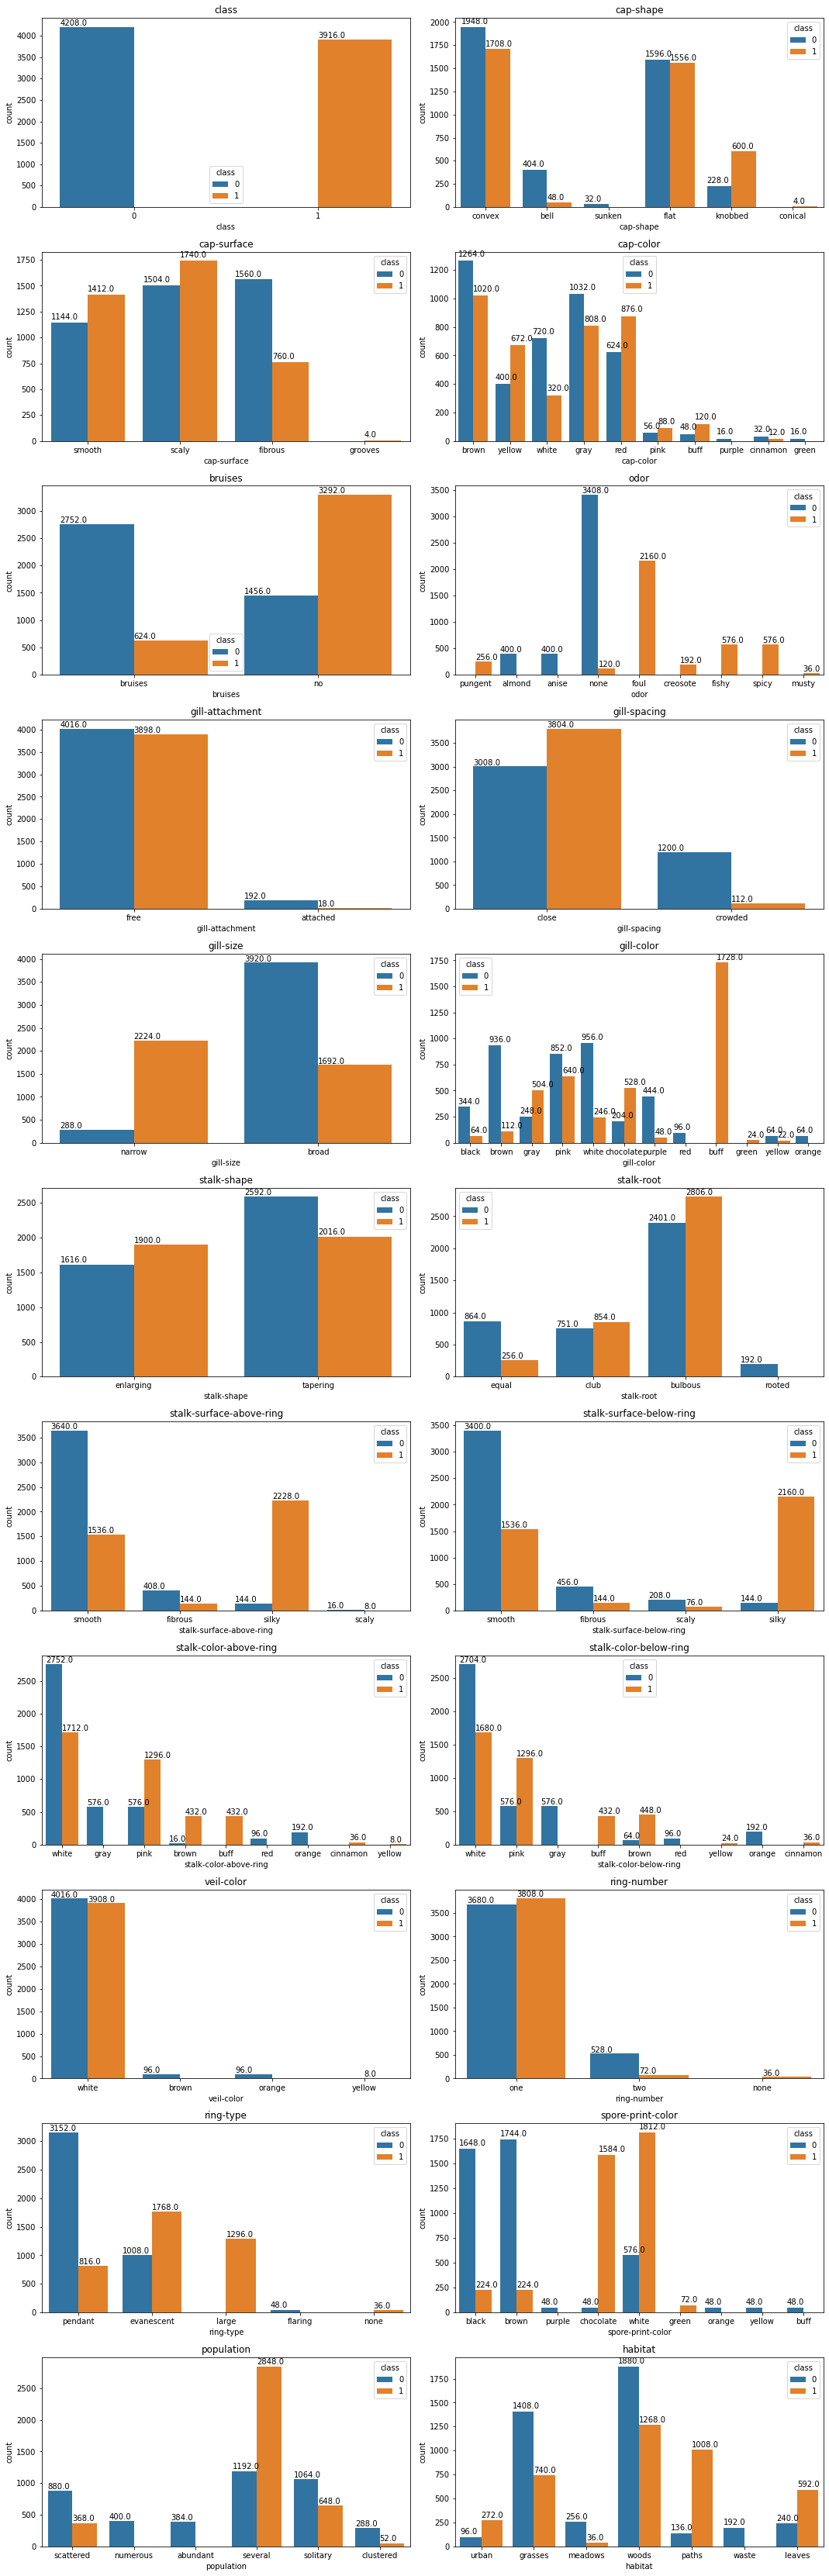

In [104]:
plt.figure(figsize=(15,50))
for i,col in enumerate(df.columns):
    ax=plt.subplot(12,2,i+1)
    sb.countplot(df[col],hue=df['class'])
    plt.title('{}'.format(col))
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x(),p.get_height()+30))
plt.tight_layout()
plt.show()
    

In [39]:
for i in df.columns:
    print(i,df[i].unique())

class [1 0]
cap-shape ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
cap-surface ['smooth' 'scaly' 'fibrous' 'grooves']
cap-color ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
bruises ['bruises' 'no']
odor ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
gill-attachment ['free' 'attached']
gill-spacing ['close' 'crowded']
gill-size ['narrow' 'broad']
gill-color ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
stalk-shape ['enlarging' 'tapering']
stalk-root ['equal' 'club' 'bulbous' 'rooted']
stalk-surface-above-ring ['smooth' 'fibrous' 'silky' 'scaly']
stalk-surface-below-ring ['smooth' 'fibrous' 'scaly' 'silky']
stalk-color-above-ring ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
stalk-color-below-ring ['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
veil-color ['white' 'brown' 'orange' 'yellow']
ring-number 

In [40]:
# Pipe line

In [41]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,0,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses


In [42]:
x=df.drop('class',axis=1)
y=df['class']

In [43]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,club,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,club,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,club,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,club,smooth,silky,white,white,white,one,evanescent,white,several,leaves


In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [45]:
xtrain.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1610,convex,fibrous,brown,no,none,free,crowded,broad,black,tapering,equal,fibrous,smooth,white,white,white,one,evanescent,black,abundant,grasses
1939,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,fibrous,smooth,white,white,white,one,evanescent,black,scattered,grasses
5573,convex,scaly,red,no,fishy,free,close,narrow,buff,tapering,bulbous,silky,silky,pink,pink,white,one,evanescent,white,several,woods
7076,convex,smooth,red,no,fishy,free,close,narrow,buff,tapering,bulbous,silky,smooth,pink,pink,white,one,evanescent,white,several,leaves
2000,convex,fibrous,brown,bruises,none,free,close,broad,white,tapering,bulbous,smooth,smooth,gray,gray,white,one,pendant,brown,several,woods


In [46]:
xtest.sample()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7549,knobbed,scaly,brown,no,foul,free,close,narrow,buff,tapering,bulbous,silky,silky,white,white,white,one,evanescent,white,several,paths


In [47]:
a=xtest.columns
a

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [48]:
step1=ColumnTransformer([('one-hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,20))])

step2=SelectKBest(chi2,k=10)

step3=LogisticRegression()

In [49]:
pipe=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

In [50]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 20, None))])),
                ('step2',
                 SelectKBest(score_func=<function chi2 at 0x00000284212DE700>)),
                ('step3', LogisticRegression())])

In [51]:
ypred=pipe.predict(xtest)
ypred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [52]:
accuracy_score(ytest,ypred)

0.9796923076923076

In [53]:
f1_score(ytest,ypred)

0.9793103448275862

In [54]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       820
           1       0.99      0.97      0.98       805

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [55]:
score=cross_val_score(pipe,x,y,cv=5,scoring='accuracy')
np.mean(score)

0.9007819628647216

In [56]:
be=np.mean(score)
cve=np.std(score)/np.mean(score)
print(be,cve)

0.9007819628647216 0.12012297690401581


In [57]:
yprob=pipe.predict_proba(xtest)
yprob.round(2)

array([[0.99, 0.01],
       [0.22, 0.78],
       [0.22, 0.78],
       ...,
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.99, 0.01]])

In [58]:
yprob=yprob[:,1]

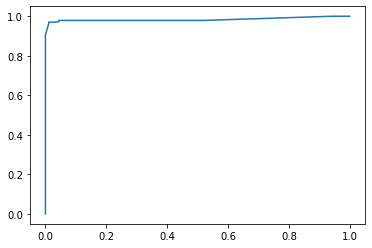

In [59]:
fpr,tpr,th=roc_curve(ytest,yprob)
plt.plot(fpr,tpr)
plt.show()

In [60]:
roc_auc_score(ytest,yprob)

0.9838039690955915

In [61]:
cohen_kappa_score(ytest,ypred)

0.9593742305725487

In [62]:
# Decision tree

In [63]:
step1=ColumnTransformer([('one-hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,20))])

step2=SelectKBest(chi2,k=10)

step3=DecisionTreeClassifier()

In [64]:
pipe1=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

In [65]:
pipe1.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 20, None))])),
                ('step2',
                 SelectKBest(score_func=<function chi2 at 0x00000284212DE700>)),
                ('step3', DecisionTreeClassifier())])

In [66]:
ypred1=pipe1.predict(xtest)
ypred1

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [67]:
accuracy_score(ytest,ypred1)

0.9827692307692307

In [68]:
# randomforest

In [69]:
step1=ColumnTransformer([('one-hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,20))])

step2=SelectKBest(chi2,k=10)

step3=RandomForestClassifier()

In [70]:
pipe2=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

In [71]:
pipe2.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 20, None))])),
                ('step2',
                 SelectKBest(score_func=<function chi2 at 0x00000284212DE700>)),
                ('step3', RandomForestClassifier())])

In [72]:
ypred2=pipe2.predict(xtest)
ypred2

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [73]:
accuracy_score(ytest,ypred2)

0.9827692307692307

In [74]:
# Adaaboost

In [75]:
step1=ColumnTransformer([('one-hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,20))])

step2=SelectKBest(chi2,k=10)

step3=AdaBoostClassifier()

pipe3=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

pipe3.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 20, None))])),
                ('step2',
                 SelectKBest(score_func=<function chi2 at 0x00000284212DE700>)),
                ('step3', AdaBoostClassifier())])

In [76]:
ypred3=pipe3.predict(xtest)
ypred3

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [77]:
accuracy_score(ytest,ypred3)

0.9790769230769231

In [78]:
# Gradient class

In [79]:
step1=ColumnTransformer([('one-hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,20))])

step2=SelectKBest(chi2,k=10)

step3=GradientBoostingClassifier()

pipe4=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

pipe4.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 20, None))])),
                ('step2',
                 SelectKBest(score_func=<function chi2 at 0x00000284212DE700>)),
                ('step3', GradientBoostingClassifier())])

In [80]:
ypred4=pipe4.predict(xtest)
ypred4

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [81]:
accuracy_score(ytest,ypred4)

0.9827692307692307

In [82]:
yprob4=pipe4.predict_proba(xtest)
yprob4.round(2)

array([[1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [83]:
yprob4=yprob4[:,1]

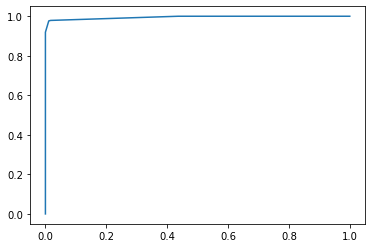

In [84]:
fpr,tpr,th=roc_curve(ytest,yprob4)
plt.plot(fpr,tpr)
plt.show()

In [85]:
roc_auc_score(ytest,yprob4)

0.9948613846386911

In [86]:
cohen_kappa_score(ytest,ypred4)

0.9655316086511875

In [87]:
import pickle

In [88]:
pickle.dump(pipe4,open('gb_pipe.pkl','wb'))

In [89]:
gbpipe=pickle.load(open('gb_pipe.pkl','rb'))

In [90]:
df.iloc[2225,:].values.reshape(1,-1)

array([[0, 'convex', 'fibrous', 'red', 'bruises', 'none', 'free',
        'close', 'broad', 'pink', 'tapering', 'bulbous', 'smooth',
        'smooth', 'white', 'pink', 'white', 'one', 'pendant', 'black',
        'several', 'woods']], dtype=object)

In [91]:
inp=x.iloc[2225,:].values.reshape(1,-1)
inp

array([['convex', 'fibrous', 'red', 'bruises', 'none', 'free', 'close',
        'broad', 'pink', 'tapering', 'bulbous', 'smooth', 'smooth',
        'white', 'pink', 'white', 'one', 'pendant', 'black', 'several',
        'woods']], dtype=object)

In [92]:
gbpipe.predict(inp)

array([0], dtype=int64)

In [93]:
# KNN

In [94]:
step1=ColumnTransformer([('one-hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,20))])

step2=SelectKBest(chi2,k=10)

step3=KNeighborsClassifier()

pipe5=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

pipe5.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 20, None))])),
                ('step2',
                 SelectKBest(score_func=<function chi2 at 0x00000284212DE700>)),
                ('step3', KNeighborsClassifier())])

In [95]:
ypred5=pipe5.predict(xtest)
ypred5

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [96]:
accuracy_score(ytest,ypred5)

0.9827692307692307

In [97]:
import xgboost
from xgboost import XGBClassifier

In [98]:
step1=ColumnTransformer([('one-hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,20))])

step2=SelectKBest(chi2,k=10)

step3=XGBClassifier()

pipe6=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

pipe6.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 20, None))])),
                ('step2',
                 SelectKBest(score_func=<function chi2 at 0x00000284212DE700>)),
                ('step3',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stoppi...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [99]:
ypred6=pipe6.predict(xtest)
ypred6

array([0, 1, 1, ..., 1, 0, 0])

In [100]:
accuracy_score(ytest,ypred6)

0.9827692307692307